# Computer Hardware Regression


### Attribute Information:
1. vendor name: Names of vendors of the hardware - 30 different values 
2. Model Name: many unique symbols
3. MYCT: machine cycle time in nanoseconds (integer)
4. MMIN: minimum main memory in kilobytes (integer)
5. MMAX: maximum main memory in kilobytes (integer)
6. CACH: cache memory in kilobytes (integer)
7. CHMIN: minimum channels in units (integer)
8. CHMAX: maximum channels in units (integer)
9. PRP: published relative performance (integer)
10. ERP: estimated relative performance from the original article (integer)

### To Predict
    ERP on basis on basis of 6 input features

### Additional Info
    There are no missing values in the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
column_names = ['vendor','model', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']

In [3]:
df = pd.read_csv('machine.data', header=None, names=column_names)

In [4]:
df.head()

,vendor,model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


# Simple EDA

In [5]:
df.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   vendor  209 non-null    object
 1   model   209 non-null    object
 2   MYCT    209 non-null    int64 
 3   MMIN    209 non-null    int64 
 4   MMAX    209 non-null    int64 
 5   CACH    209 non-null    int64 
 6   CHMIN   209 non-null    int64 
 7   CHMAX   209 non-null    int64 
 8   PRP     209 non-null    int64 
 9   ERP     209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB


In [7]:
df.dtypes

vendor    object
model     object
MYCT       int64
MMIN       int64
MMAX       int64
CACH       int64
CHMIN      int64
CHMAX      int64
PRP        int64
ERP        int64
dtype: object

In [8]:
df.corr()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
MYCT,1.000000,-0.335642,-0.378561,-0.321000,-0.301090,-0.250502,-0.307099,-0.288396
MMIN,-0.335642,1.000000,0.758157,0.534729,0.517189,0.266907,0.794931,0.819292
MMAX,-0.378561,0.758157,1.000000,0.537990,0.560513,0.527246,0.863004,0.901202
CACH,-0.321000,0.534729,0.537990,1.000000,0.582245,0.487846,0.662641,0.648620
CHMIN,-0.301090,0.517189,0.560513,0.582245,1.000000,0.548281,0.608903,0.610580
CHMAX,-0.250502,0.266907,0.527246,0.487846,0.548281,1.000000,0.605209,0.592156
PRP,-0.307099,0.794931,0.863004,0.662641,0.608903,0.605209,1.000000,0.966472
ERP,-0.288396,0.819292,0.901202,0.648620,0.610580,0.592156,0.966472,1.000000


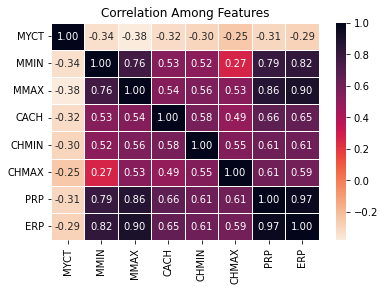

In [9]:
sns.heatmap(df.corr(), cmap='rocket_r', annot=True, fmt='.2f', linewidth=0.5)
plt.title('Correlation Among Features')
plt.show()

# Box plotting to find outliers

In [10]:
features = [feature for feature in df.columns if df[feature].dtype == np.int64]
print('Numerical Features: ')
features

Numerical Features: 


['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']

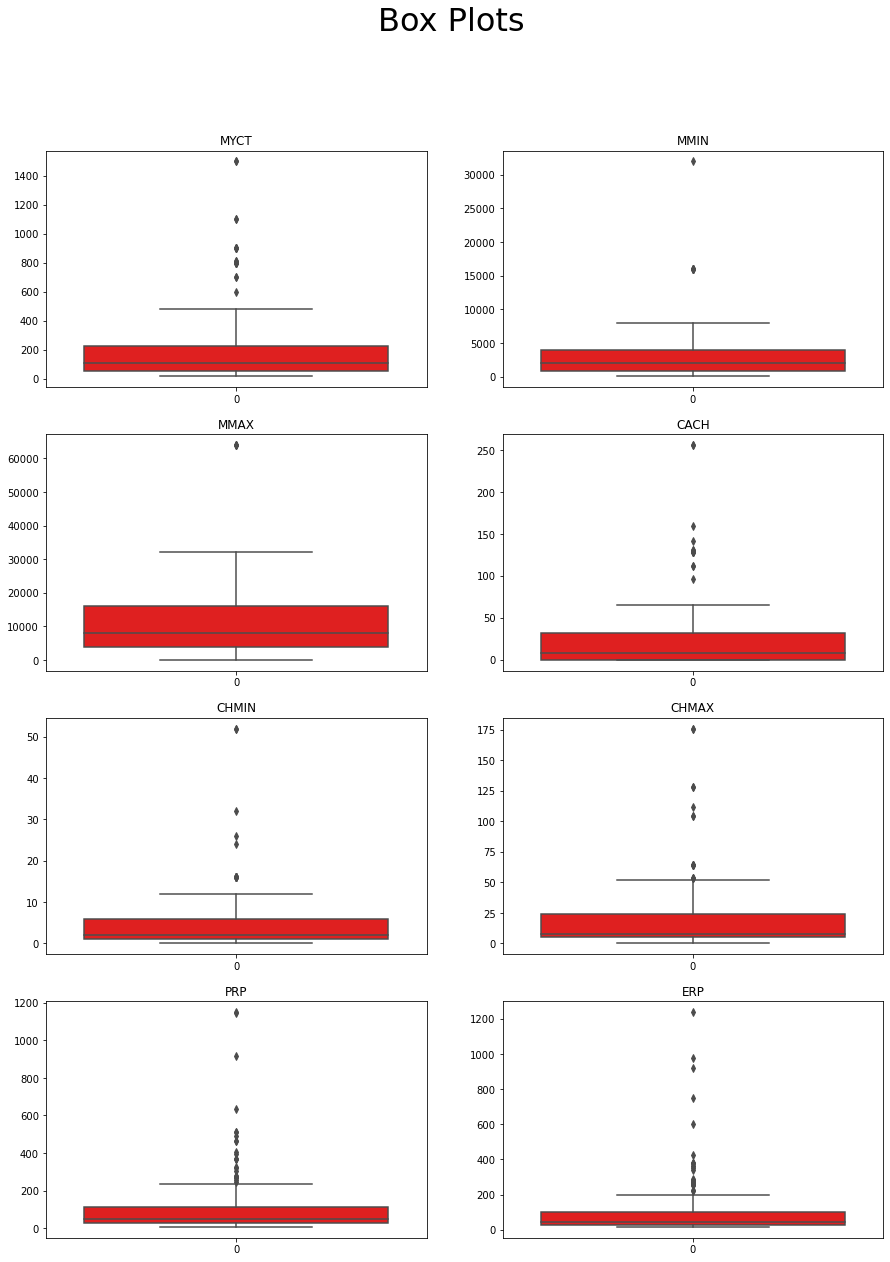

In [11]:
fig, axs = plt.subplots(ncols = 2, nrows=4,figsize = (15, 20))
fig.suptitle('Box Plots', fontsize= 32)
axs = axs.flatten()
for ind, feature in enumerate(features):
    sns.boxplot(data=df[feature], color='red', ax=axs[ind])
    axs[ind].set_title(feature)
plt.show()

# Separating Input and Output Features

In [12]:
X = df[features].drop('ERP', axis=1)
y = df['ERP']

In [13]:
X.head(3)

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
0,125,256,6000,256,16,128,198
1,29,8000,32000,32,8,32,269
2,29,8000,32000,32,8,32,220


In [14]:
y.head(3)

0    199
1    253
2    253
Name: ERP, dtype: int64

# Train test split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

# Model without Scaling

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lm = LinearRegression()

In [19]:
lm.fit(X_train, y_train)

LinearRegression()

## Evaluation

In [20]:
y_pred = lm.predict(X_test)

In [21]:
from sklearn.metrics import r2_score, mean_squared_error

In [22]:
r2_score(y_test, y_pred)

0.9030240858028924

In [23]:
mean_squared_error(y_test, y_pred)

5225.936188534769

## Plotting residuals

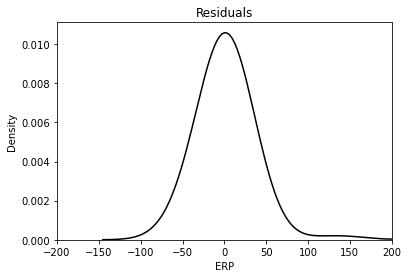

In [24]:
residuals = y_test - y_pred
sns.kdeplot(residuals, color='black')
plt.title('Residuals')
plt.xlim(-200, 200)
plt.show()

## Plotting Actual Values vs Predicted Values

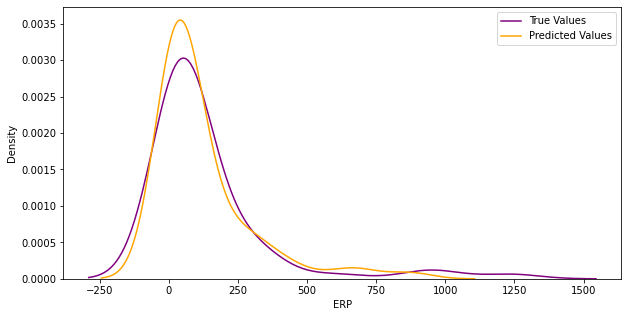

In [25]:
plt.figure(figsize=(10, 5))
sns.kdeplot(y_test, color='purple', label='True Values')
sns.kdeplot(y_pred, color='orange', label='Predicted Values')
plt.legend(loc='best')
plt.show()

# Conclusion
Working better without scaling than I predicted.

# Model with scaling

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [27]:
pipeline = Pipeline([('scaler', StandardScaler()), ('lin_reg', LinearRegression())])

In [28]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lin_reg', LinearRegression())])

## Evaluation

In [29]:
y_pred = pipeline.predict(X_test)

In [30]:
r2_score(y_test, y_pred)

0.9030240858028936

In [31]:
mean_squared_error(y_test, y_pred)

5225.9361885347025

## Plotting Residuals

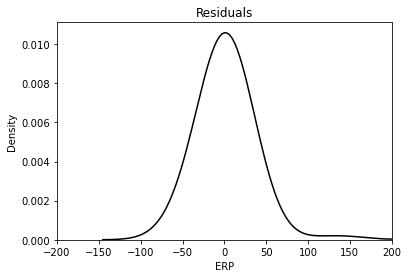

In [32]:
residuals = y_test - y_pred
sns.kdeplot(residuals, color='black')
plt.title('Residuals')
plt.xlim(-200, 200)
plt.show()

## Plotting Actual Values vs Predictions

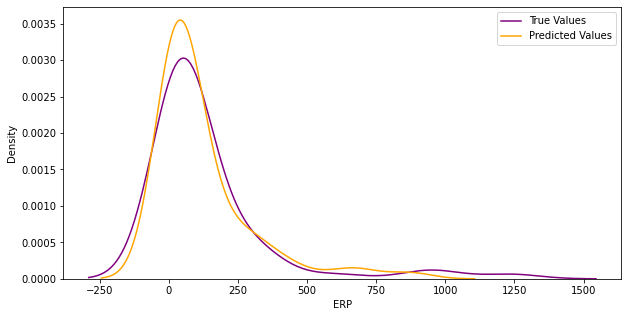

In [33]:
plt.figure(figsize=(10, 5))
sns.kdeplot(y_test, color='purple', label='True Values')
sns.kdeplot(y_pred, color='orange', label='Predicted Values')
plt.legend(loc='best')
plt.show()

# Conclusion
There is no major change in case of scaling the input data

# Scaled vs Unscaled Data

In [34]:
scaled = pipeline.predict(X_test)
unscaled = lm.predict(X_test)

In [35]:
difference = scaled - unscaled

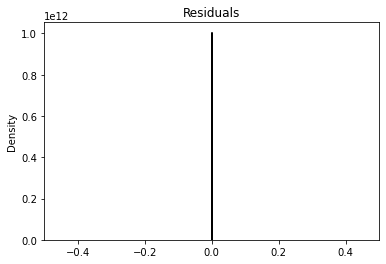

In [36]:
sns.kdeplot(difference, color='black')
plt.title('Residuals')
plt.xlim(-0.5, 0.5)
plt.show()

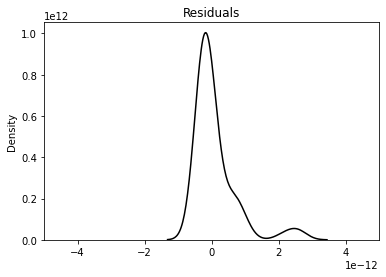

In [37]:
sns.kdeplot(difference, color='black')
plt.title('Residuals')
plt.xlim(-0.000000000005, 0.000000000005)
plt.show()

# Conclusion
The change is very minimalistic